In [3]:
import zipfile

# Unzip the archive
local_zip = 'C:\\Users\\TGDD\\Desktop\\học máy\\cuối kỳ\\./animals.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

Liệt kê cấu trúc thư mục

In [5]:
import os

base_dir = 'animals'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['cats', 'chickens', 'dogs']

Contents of validation directory:
['cats', 'chickens', 'dogs']


In [6]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_chickens_dir = os.path.join(train_dir, 'chickens')

# Directory with validation pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_chickens_dir = os.path.join(validation_dir, 'chickens')

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
train_chicken_fnames = os.listdir(train_chickens_dir)

validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)
validation_chicken_fnames = os.listdir(validation_chickens_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print(train_chicken_fnames[:10])

print('total training cat images :', len(train_cat_fnames))
print('total training dog images :', len(train_dog_fnames))
print('total training chicken images :', len(train_chicken_fnames))

print('total validation cat images :', len(validation_cat_fnames))
print('total validation dog images :', len(validation_dog_fnames))
print('total validation chicken images :', len(validation_chicken_fnames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['10.jpeg', '100.jpeg', '1000.jpeg', '1001.jpeg', '1010.jpeg', '1013.jpeg', '1016.jpeg', '1017.jpeg', '1018.jpeg', '102.jpeg']
total training cat images : 1000
total training dog images : 1000
total training chicken images : 1000
total validation cat images : 500
total validation dog images : 500
total validation chicken images : 500


Hiển thị 1 số ảnh ví dụ

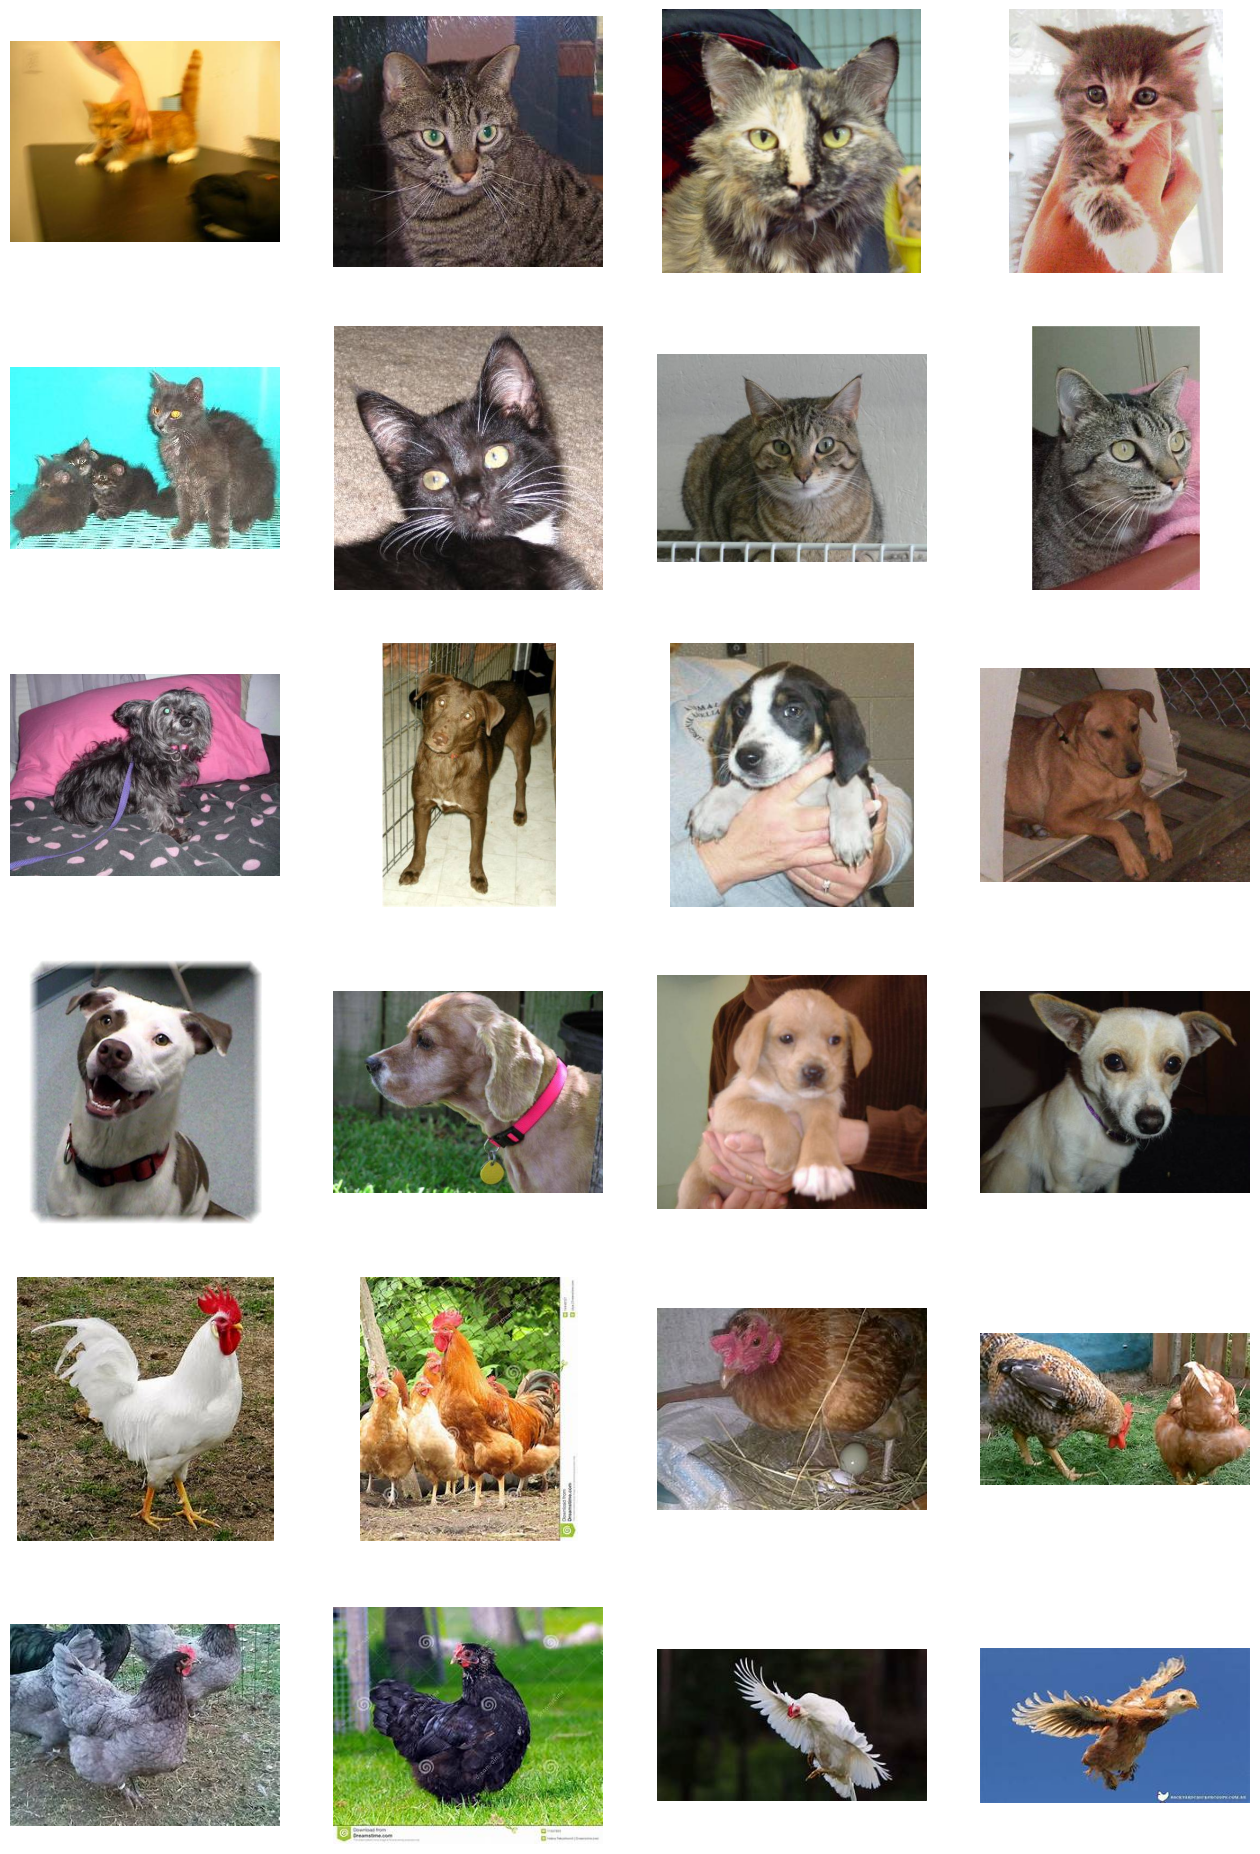

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 6x4 configuration
nrows = 6
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[:8]
               ]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[:8]
               ]
next_chicken_pix = [os.path.join(train_chickens_dir, fname)
                for fname in train_chicken_fnames[:8]
               ]

for i, img_path in enumerate(next_cat_pix + next_dog_pix + next_chicken_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

Đọc và tiền xử lí dữ liệu

In [10]:
image_size = 512 # tất cả ảnh được đưa về cùng kích thước 512x512

In [11]:
### Ảnh đc đọc bằng Open cv và tiền xử lý bằng HOG

In [13]:
import cv2
from tqdm import tqdm
from skimage.feature import hog

X_train = np.zeros((3000, int(image_size**2 / 32)))

train_cat_img_paths = [
    os.path.join(train_cats_dir, fname) for fname in train_cat_fnames
    ]
train_dog_img_paths = [
    os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames
    ]
train_chicken_img_paths = [
    os.path.join(train_chickens_dir, fname) for fname in train_chicken_fnames
    ]

count = 0

for img_path in tqdm(train_cat_img_paths + train_dog_img_paths + train_chicken_img_paths):
    img = cv2.resize(cv2.imread(img_path), (image_size, image_size))

    fd = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), channel_axis=-1)

    X_train[count] = fd
    count += 1

y_train = 1000 * ['cat'] + 1000 * ['dog'] + 1000 * ['chicken']

100%|██████████| 3000/3000 [04:56<00:00, 10.13it/s]


### Minh họa kết quả HOG

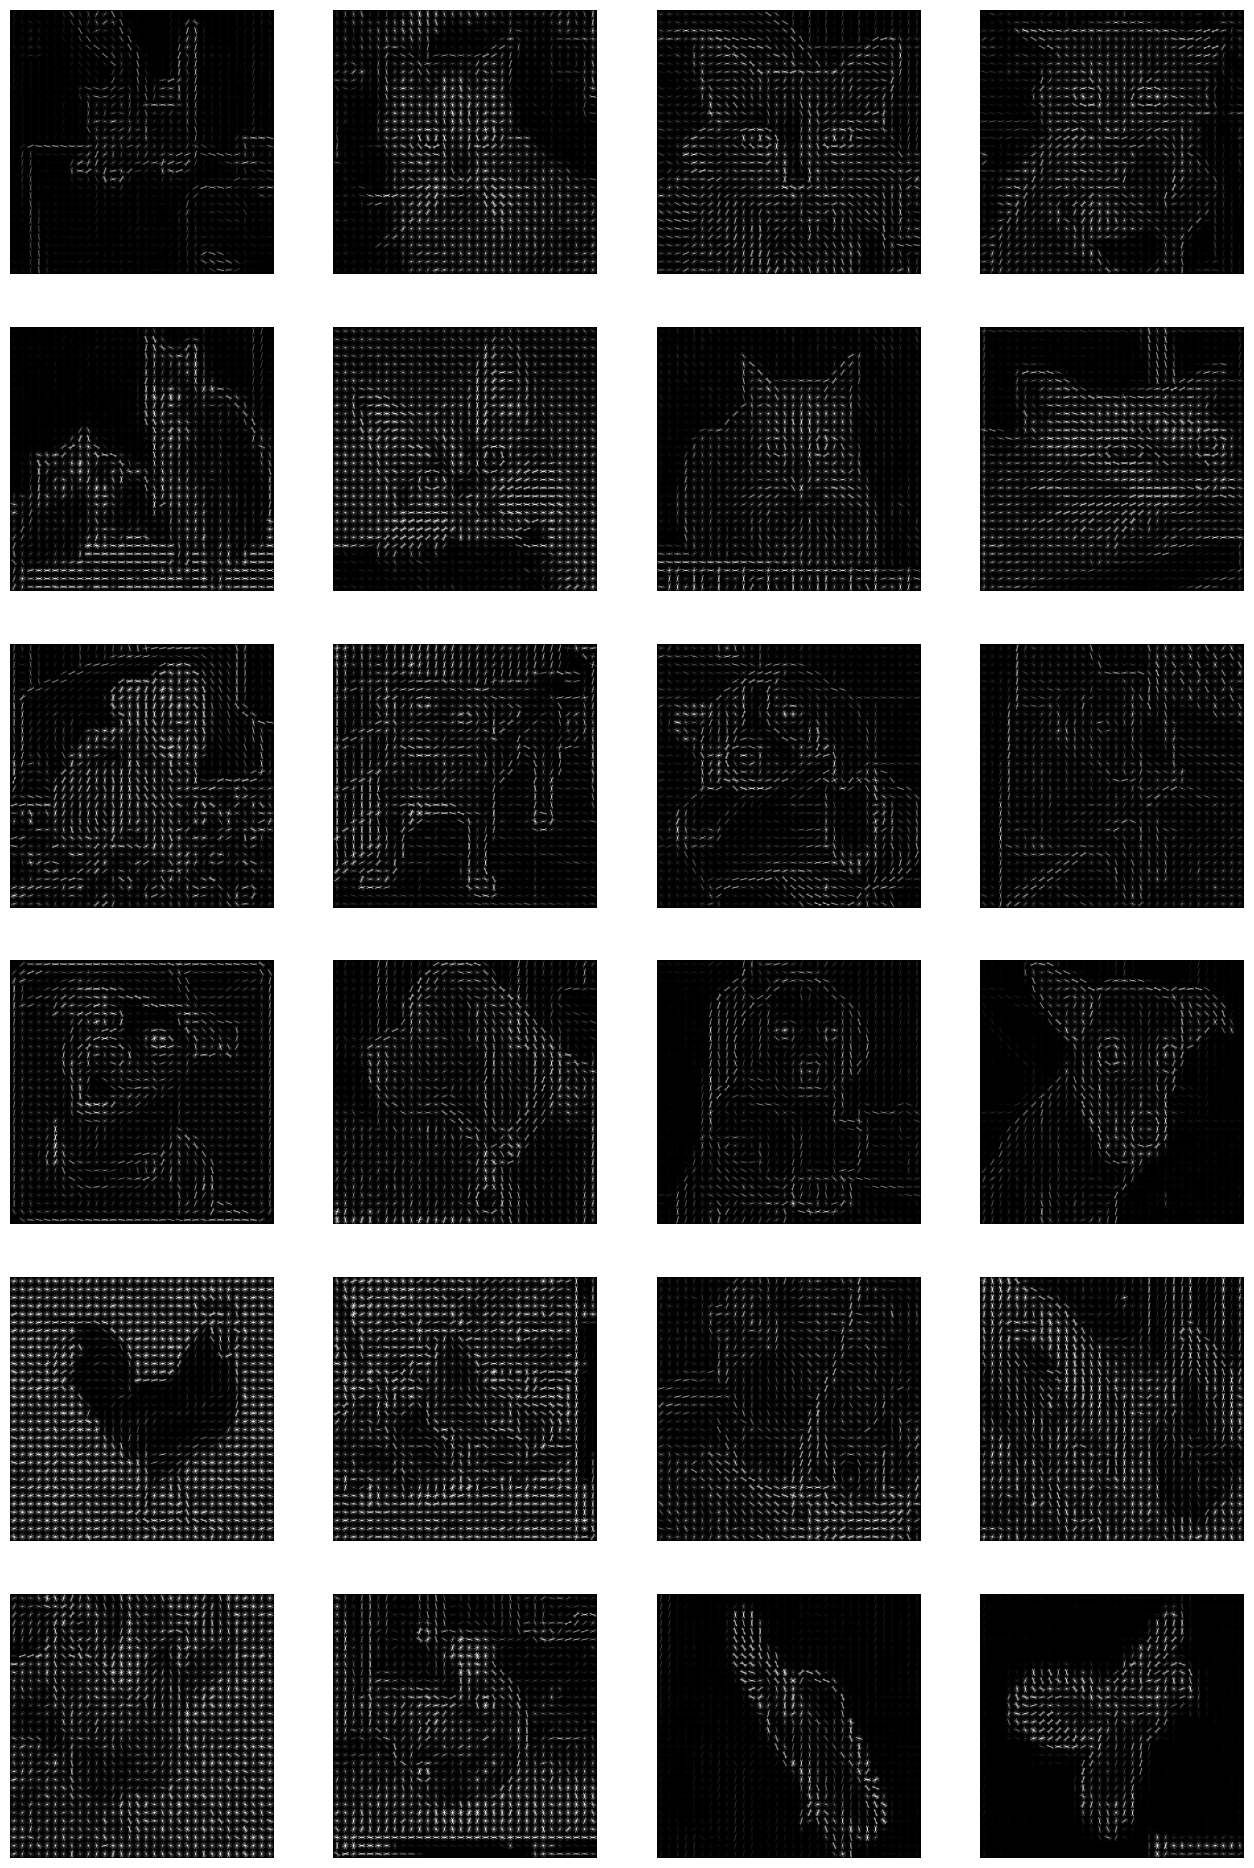

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

# Parameters for our graph; we'll output images in a 6x4 configuration
nrows = 6
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[:8]
               ]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[:8]
               ]
next_chicken_pix = [os.path.join(train_chickens_dir, fname)
                for fname in train_chicken_fnames[:8]
               ]

for i, img_path in enumerate(next_cat_pix + next_dog_pix + next_chicken_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = cv2.resize(cv2.imread(img_path), (image_size, image_size))

    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)

plt.show()

In [15]:
from tqdm import tqdm

X_test = np.zeros((1500, int(image_size**2 / 32)))

validation_cat_img_paths = [
    os.path.join(validation_cats_dir, fname) for fname in validation_cat_fnames
    ]
validation_dog_img_paths = [
    os.path.join(validation_dogs_dir, fname) for fname in validation_dog_fnames
    ]
validation_chicken_img_paths = [
    os.path.join(validation_chickens_dir, fname) for fname in validation_chicken_fnames
    ]

count = 0

for img_path in tqdm(validation_cat_img_paths + validation_dog_img_paths + validation_chicken_img_paths):
    img = cv2.resize(cv2.imread(img_path), (image_size, image_size))

    fd = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), channel_axis=-1)

    X_test[count] = fd
    count += 1

y_test = 500 * ['cat'] + 500 * ['dog'] + 500 * ['chicken']

100%|██████████| 1500/1500 [03:02<00:00,  8.24it/s]


### Giảm chiều Bằng PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

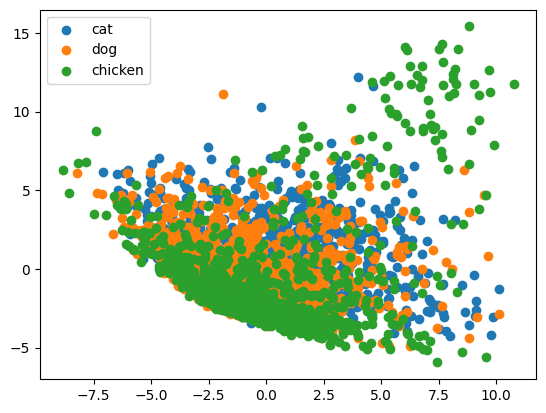

In [17]:
import matplotlib.pyplot as plt

x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
z = X_train_pca[:, 2]

plt.scatter(x[:1000], y[:1000], label='cat')
plt.scatter(x[1000:2000], y[1000:2000], label='dog')
plt.scatter(x[2000:], y[2000:], label='chicken')

plt.legend()

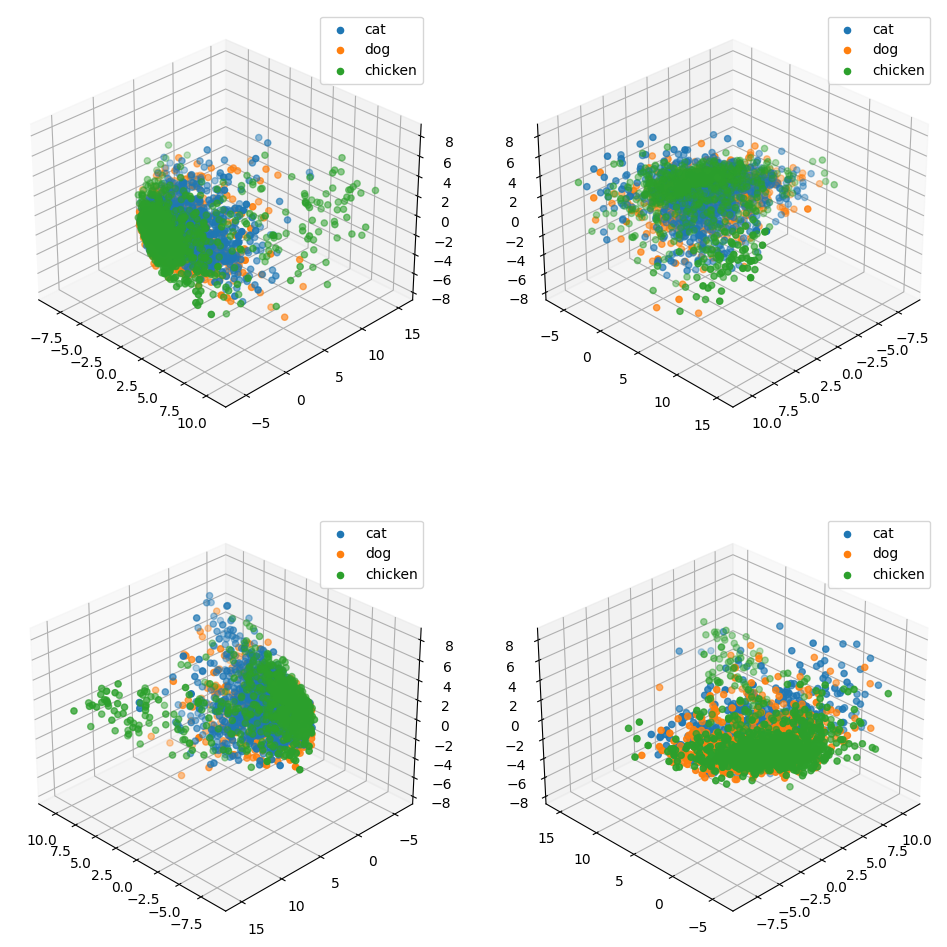

In [18]:
fig = plt.figure(figsize=(12, 12))

for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')

    ax.scatter(x[:1000], y[:1000], z[:1000], label='cat')
    ax.scatter(x[1000:2000], y[1000:2000], z[1000:2000], label='dog')
    ax.scatter(x[2000:], y[2000:], z[2000:], label='chicken')

    # ax.set_xticklabels([])
    # ax.set_yticklabels([])
    # ax.set_zticklabels([])

    ax.view_init(azim=-45 + 90 * i)

    ax.legend()

### Phân Cụm bằng K-mean

In [21]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

D:\python\PythonZero\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Đếm số lượng dữ liệu đc phân vào mỗi cluster

In [22]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

np.asarray((unique, counts))

array([[   0,    1,    2],
       [1554, 1111,  335]], dtype=int64)

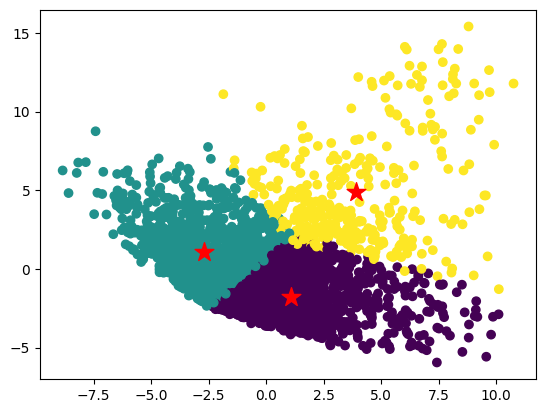

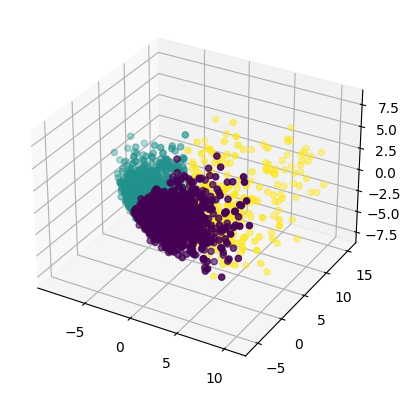

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
z = X_train_pca[:, 2]

plt.scatter(x, y, c=kmeans.labels_)

cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, color='red')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=kmeans.labels_)

plt.show()

### Phân loại bằng Softmax Regression

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            max_iter=10000,
                            random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42,
                   solver='saga')

In [25]:
# Use the trained model to predict the classes of the test set
y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy:", accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Calculate the precision of each class
precision = precision_score(y_test, y_pred, average=None)

# Print the precision of each class
print("Precision of each class:", precision)

# Calculate the recall of each class
recall = recall_score(y_test, y_pred, average=None)

# Print the recall of each class
print("Recall of each class:", recall)

# Print confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Train accuracy: 1.0
Test accuracy: 0.6453333333333333
Precision of each class: [0.64658635 0.69918699 0.59215686]
Recall of each class: [0.644 0.688 0.604]
Confusion matrix:
[[322  62 116]
 [ 64 344  92]
 [112  86 302]]


### Phân loại Bằng SVM
### Linear kernel

In [27]:
from sklearn.svm import SVC

# Train an SVM classifier with a linear kernel
svm = SVC(kernel='linear',
          decision_function_shape='ovo')
svm.fit(X_train, y_train)

SVC(decision_function_shape='ovo', kernel='linear')

In [28]:
# Use the trained model to predict the classes of the test set
y_train_pred = svm.predict(X_train)
y_pred = svm.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy:", accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Calculate the precision of each class
precision = precision_score(y_test, y_pred, average=None)

# Print the precision of each class
print("Precision of each class:", precision)

# Calculate the recall of each class
recall = recall_score(y_test, y_pred, average=None)

# Print the recall of each class
print("Recall of each class:", recall)

# Print confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Train accuracy: 1.0
Test accuracy: 0.622
Precision of each class: [0.61026616 0.68723404 0.5734127 ]
Recall of each class: [0.642 0.646 0.578]
Confusion matrix:
[[321  62 117]
 [ 79 323  98]
 [126  85 289]]


### Sigmoid kernel

In [30]:
from sklearn.svm import SVC

# Train an SVM classifier with a sigmoid kernel
svm = SVC(kernel='sigmoid', gamma='auto',
          decision_function_shape='ovo')
svm.fit(X_train, y_train)

SVC(decision_function_shape='ovo', gamma='auto', kernel='sigmoid')

In [31]:
# Use the trained model to predict the classes of the test set
y_train_pred = svm.predict(X_train)
y_pred = svm.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy:", accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Calculate the precision of each class
precision = precision_score(y_test, y_pred, average=None)

# Print the precision of each class
print("Precision of each class:", precision)

# Calculate the recall of each class
recall = recall_score(y_test, y_pred, average=None)

# Print the recall of each class
print("Recall of each class:", recall)

# Print confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Train accuracy: 0.48
Test accuracy: 0.456
Precision of each class: [0.60189573 0.51       0.39707537]
Recall of each class: [0.254 0.408 0.706]
Confusion matrix:
[[127  90 283]
 [ 43 204 253]
 [ 41 106 353]]


### Radial Basic Function (RBF) kernel

In [34]:
from sklearn.svm import SVC

# Train an SVM classifier with a rbf kernel
svm = SVC(kernel='rbf',
          decision_function_shape='ovo')
svm.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [35]:
# Use the trained model to predict the classes of the test set
y_train_pred = svm.predict(X_train)
y_pred = svm.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy:", accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Calculate the precision of each class
precision = precision_score(y_test, y_pred, average=None)

# Print the precision of each class
print("Precision of each class:", precision)

# Calculate the recall of each class
recall = recall_score(y_test, y_pred, average=None)

# Print the recall of each class
print("Recall of each class:", recall)

# Print confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Train accuracy: 0.9496666666666667
Test accuracy: 0.6573333333333333
Precision of each class: [0.64098074 0.72258065 0.61206897]
Recall of each class: [0.732 0.672 0.568]
Confusion matrix:
[[366  39  95]
 [ 79 336  85]
 [126  90 284]]


### Poly kernel

In [37]:
from sklearn.svm import SVC

# Train an SVM classifier with a poly kernel
svm = SVC(kernel='poly', gamma=1, coef0=1,
          decision_function_shape='ovo')
svm.fit(X_train, y_train)

SVC(coef0=1, decision_function_shape='ovo', gamma=1, kernel='poly')

In [38]:
# Use the trained model to predict the classes of the test set
y_train_pred = svm.predict(X_train)
y_pred = svm.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy:", accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Calculate the precision of each class
precision = precision_score(y_test, y_pred, average=None)

# Print the precision of each class
print("Precision of each class:", precision)

# Calculate the recall of each class
recall = recall_score(y_test, y_pred, average=None)

# Print the recall of each class
print("Recall of each class:", recall)

# Print confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Train accuracy: 1.0
Test accuracy: 0.642
Precision of each class: [0.64023211 0.71762208 0.57421875]
Recall of each class: [0.662 0.676 0.588]
Confusion matrix:
[[331  47 122]
 [ 66 338  96]
 [120  86 294]]
